<h3>시리즈별 평균 수익률 시각화 (기준가격: 가장 최근에 거래된 가격(사이즈 무관))<h3>

수익률 = (가장 최근 거래가/발매가)*100


In [2]:
import pandas as pd
# 한글깨짐 방지
#!apt -qq -y install fonts-nanum > /dev/null
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# fontpath = '/usr/local/lib/[python-version]/dist-packages/matplotlib/mpl-data/fonts/ttf/'
# font = fm.FontProperties(fname=fontpath, size=10)
# # fm._rebuild()

# # 그래프에 retina display 적용
# %config InlineBackend.figure_format = 'retina'


# # Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumBarunGothic')

# import plotly.express as px

In [3]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [4]:
# import matplotlib.font_manager as fm
# fm.fontManager.ttflist # 사용 가능한 폰트 확인
# [f.name for f in fm.fontManager.ttflist]

In [5]:
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm

# [f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

In [6]:
# import matplotlib
# import matplotlib.font_manager as fm
# import matplotlib.pyplot as plt

# plt.rc('font', family='NanumMyeongjo') # For Windows
# print(plt.rcParams['font.family'])

In [7]:
import pandas as pd
df = pd.read_csv("kream_product2.csv")


In [8]:
df[df['Jordan 21']== 1]

,_id,brand,prod_kr_name,rescent_price,model_no,release_date,colors,release_price,instant_buy_price,instant_sell_price,...,Sheila Rashid,Comme des Garcons Homme,Carmelo Anthony,Rag & Bone,Vogue,PSNY,Serena Williams,Pendleton,Carhartt,Rox Brown
1889,Jordan 21 White Varsity Red 2006,Jordan,조던 21 화이트 바시티 레드 2006,0,313038-161,2006-02-19,WHITE/VARSITY RED-METALLIC SILVER,228100,600000,175000,...,0,0,0,0,0,0,0,0,0,0
2708,Jordan 21 OG Red Suede,Jordan,조던 21 OG 레드 스웨이드,0,313495-602,2006-02-19,VARSITY RED/METALLIC SILVER-BLACK,234600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# 원핫인코딩 삭제
df1 = df.loc[:,['_id', 'brand', 'prod_kr_name', 'rescent_price', 'model_no',
       'release_date', 'colors', 'release_price', 'instant_buy_price',
       'instant_sell_price']]
df1.head()

,_id,brand,prod_kr_name,rescent_price,model_no,release_date,colors,release_price,instant_buy_price,instant_sell_price
0,Jordan 1 Low Vintage Grey,Jordan,조던 1 로우 빈티지 그레이,200000,553558-053,2022-07-05,GREY/WHITE/CREAM,129000,202000,201000
1,Jordan 1 x Travis Scott x Fragment Retro Low O...,Jordan,조던 1 x 트래비스 스캇 x 프라그먼트 레트로 로우 OG SP 밀리터리 블루,1555000,DM7866-140,2021-08-13,SAIL/BLACK/MILITARY BLUE,189000,1540000,2230000
2,Jordan 1 Retro High OG Black Mocha,Jordan,조던 1 레트로 하이 OG 블랙 모카,702000,555088-105,2020-11-13,SAIL/DARK MOCHA-BLACK-BLACK,199000,600000,818000
3,Jordan 4 Retro White and Black,Jordan,조던 4 레트로 화이트 앤 블랙,312000,DH6927-111,2022-05-23,WHITE/BLACK/NEUTRAL GREY,249000,299000,313000
4,Jordan 1 Retro High OG Bleached Coral,Jordan,조던 1 레트로 하이 OG 블리치드 코랄,244000,555088-108,2022-05-14,WHITE/BLACK/GREY FOG/BLEACHED CORAL,209000,207000,270000


In [10]:
# 시리즈 분류만
df2 = df.loc[:,['_id','rescent_price','release_price','OG','Retro','SP','QS','SB','SE']]
df2

,_id,rescent_price,release_price,OG,Retro,SP,QS,SB,SE
0,Jordan 1 Low Vintage Grey,200000,129000,0,0,0,0,0,0
1,Jordan 1 x Travis Scott x Fragment Retro Low O...,1555000,189000,1,1,1,0,0,0
2,Jordan 1 Retro High OG Black Mocha,702000,199000,1,1,0,0,0,0
3,Jordan 4 Retro White and Black,312000,249000,0,1,0,0,0,0
4,Jordan 1 Retro High OG Bleached Coral,244000,209000,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2988,Jordan 1 Retro High OG SP Gina (Special Box),0,234600,1,1,1,0,0,0
2989,Jordan 13 Retro Low Quai 54,0,325200,0,1,0,0,0,0
2990,(GS) Jordan 11 Retro Heiress Velvet,290000,286200,0,1,0,0,0,0
2991,Jordan 1 Retro High Flyknit Derek Jeter RE2PECT,350000,234100,0,1,0,0,0,0


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993 entries, 0 to 2992
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   _id            2993 non-null   object
 1   rescent_price  2993 non-null   int64 
 2   release_price  2993 non-null   int64 
 3   OG             2993 non-null   int64 
 4   Retro          2993 non-null   int64 
 5   SP             2993 non-null   int64 
 6   QS             2993 non-null   int64 
 7   SB             2993 non-null   int64 
 8   SE             2993 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 210.6+ KB


In [12]:
# OG 222 / Retro 1600 / SP 71 / QS 1 / SB 8

In [13]:
df2.groupby('OG')['rescent_price'].count().to_frame().reset_index()

,OG,rescent_price
0,0,2771
1,1,222


In [14]:
re1 = df2.groupby('Retro')['rescent_price'].mean().to_frame().reset_index()
re1

,Retro,rescent_price
0,0,176205.312276
1,1,264655.000000


In [15]:
sp1 =df2.groupby('SP')['rescent_price'].mean().to_frame().reset_index()
sp1

,SP,rescent_price
0,0,219973.990418
1,1,368140.845070


In [16]:
df2.groupby('SP')['rescent_price'].count().to_frame().reset_index()

,SP,rescent_price
0,0,2922
1,1,71


In [17]:
qs1 = df2.groupby('QS')['rescent_price'].mean().to_frame().reset_index()
qs1

,QS,rescent_price
0,0,223463.235294
1,1,300000.000000


In [18]:
df2.groupby('QS')['rescent_price'].count().to_frame().reset_index()

,QS,rescent_price
0,0,2992
1,1,1


In [19]:
sb1 = df2.groupby('SB')['rescent_price'].mean().to_frame().reset_index()
sb1

,SB,rescent_price
0,0,222695.142379
1,1,519625.000000


In [20]:
df2.groupby('SB')['rescent_price'].count().to_frame().reset_index()

,SB,rescent_price
0,0,2985
1,1,8


In [21]:
se1 = df2.groupby('SE')['rescent_price'].mean().to_frame().reset_index()
se1

,SE,rescent_price
0,0,227868.720205
1,1,178586.466165


In [22]:
sample1=[('Retro','264655'),('SP','368140'),('OG','488292')]
tmp = pd.DataFrame(sample1,columns=["series",'rescent_price'])
table = tmp.astype({'rescent_price':int})
table

,series,rescent_price
0,Retro,264655
1,SP,368140
2,OG,488292


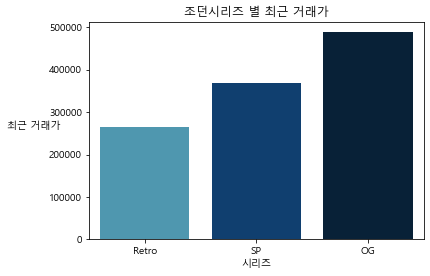

In [23]:
sns.barplot(x='series', y='rescent_price', data=table, palette='ocean_r')
plt.xlabel("시리즈")
plt.ylabel("최근 거래가",rotation=0,labelpad=15)
plt.title("조던시리즈 별 최근 거래가")
plt.xticks(rotation=0)
plt.show()

In [24]:
sample2=[('Retro','1600'),('SP','71'),('OG','222')]
tmp1 = pd.DataFrame(sample2,columns=["series",'count'])
table1 = tmp1.astype({'count':int})
table1

,series,count
0,Retro,1600
1,SP,71
2,OG,222


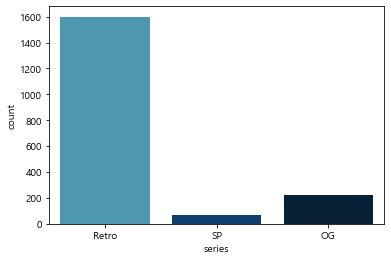

In [25]:
sns.barplot(x='series', y='count', data=table1, palette='ocean_r')
plt.show()

In [26]:
total = pd.merge(table1,table,how='left',on='series')
total

,series,count,rescent_price
0,Retro,1600,264655
1,SP,71,368140
2,OG,222,488292


In [28]:
a=df2[df2['rescent_price']== 0].index
df3 = df2.drop(a,axis='index').reset_index(drop=True)
df3


,_id,rescent_price,release_price,OG,Retro,SP,QS,SB,SE
0,Jordan 1 Low Vintage Grey,200000,129000,0,0,0,0,0,0
1,Jordan 1 x Travis Scott x Fragment Retro Low O...,1555000,189000,1,1,1,0,0,0
2,Jordan 1 Retro High OG Black Mocha,702000,199000,1,1,0,0,0,0
3,Jordan 4 Retro White and Black,312000,249000,0,1,0,0,0,0
4,Jordan 1 Retro High OG Bleached Coral,244000,209000,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2308,Jordan Winterized 6 Rings Burgundy,50000,208600,0,0,0,0,0,0
2309,Jordan 13 Retro Low Hornets,359000,208600,0,1,0,0,0,0
2310,(GS) Jordan 11 Retro Heiress Velvet,290000,286200,0,1,0,0,0,0
2311,Jordan 1 Retro High Flyknit Derek Jeter RE2PECT,350000,234100,0,1,0,0,0,0


In [29]:
df3['benefit']= df3['rescent_price']/df3['release_price']*100
df3

,_id,rescent_price,release_price,OG,Retro,SP,QS,SB,SE,benefit
0,Jordan 1 Low Vintage Grey,200000,129000,0,0,0,0,0,0,155.038760
1,Jordan 1 x Travis Scott x Fragment Retro Low O...,1555000,189000,1,1,1,0,0,0,822.751323
2,Jordan 1 Retro High OG Black Mocha,702000,199000,1,1,0,0,0,0,352.763819
3,Jordan 4 Retro White and Black,312000,249000,0,1,0,0,0,0,125.301205
4,Jordan 1 Retro High OG Bleached Coral,244000,209000,1,1,0,0,0,0,116.746411
...,...,...,...,...,...,...,...,...,...,...
2308,Jordan Winterized 6 Rings Burgundy,50000,208600,0,0,0,0,0,0,23.969319
2309,Jordan 13 Retro Low Hornets,359000,208600,0,1,0,0,0,0,172.099712
2310,(GS) Jordan 11 Retro Heiress Velvet,290000,286200,0,1,0,0,0,0,101.327743
2311,Jordan 1 Retro High Flyknit Derek Jeter RE2PECT,350000,234100,0,1,0,0,0,0,149.508757


In [30]:
tt = df3.replace("0.000000",'0')
tt = tt.replace("inf",'0')
tt = tt.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
tt.sort_values(by='benefit',ascending=False)

,_id,rescent_price,release_price,OG,Retro,SP,QS,SB,SE,benefit
1702,Jordan 1 Retro High Banned 2011,5000000,162900,0,1,0,0,0,0,3069.367710
1726,Jordan 1 Retro Chicago 1994,3200000,104300,0,1,0,0,0,0,3068.072867
1004,Jordan 1 x Off-White Retro High White,6800000,247700,0,1,0,0,0,0,2745.256358
435,Jordan 1 x Off-White Retro High Chicago The Ten,6000000,247700,0,1,0,0,0,0,2422.285022
836,Jordan 1 Retro High Think 16 (Pass the Torch),3900000,189000,0,1,0,0,0,0,2063.492063
...,...,...,...,...,...,...,...,...,...,...
2285,Jordan Proto Max 720 Black Racer Blue Hyper Vi...,80000,260700,0,0,0,0,0,0,30.686613
1606,(GS) Jordan 3 Retro Cyber Monday 2016,70000,247700,0,1,0,0,0,0,28.259992
1916,(W) Jordan 1 Retro Low Slip Infra-Bred,40000,143400,0,1,0,0,0,0,27.894003
2133,(GS) Jordan 9 Retro Statue,50000,182500,0,1,0,0,0,0,27.397260


In [31]:
tt.groupby('OG')['benefit'].mean().to_frame().reset_index(drop=True)

,benefit
0,150.975741
1,254.488528


In [32]:
tt.groupby('Retro')['benefit'].mean().to_frame().reset_index(drop=True)

,benefit
0,145.609776
1,172.655982


In [33]:
tt.groupby('SP')['benefit'].mean().to_frame().reset_index(drop=True)

,benefit
0,158.902325
1,198.983099


In [34]:
sample3=[('Retro','172'),('SP','198'),('OG','254')]
tmp2 = pd.DataFrame(sample3,columns=["series",'benefit'])
ttt = tmp2.astype({'benefit':int})
ttt

,series,benefit
0,Retro,172
1,SP,198
2,OG,254


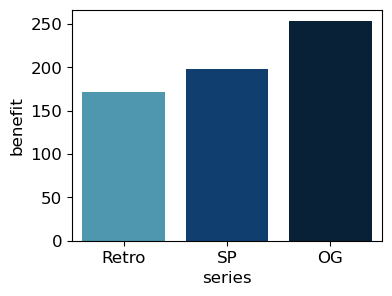

In [35]:
sns.barplot(x='series', y='benefit', data=ttt, palette='ocean_r')
plt.show()

In [37]:
# 시리즈 구분하여 원핫인코딩
# df['OG'] = df['_id'].str.contains(pat= 'OG').astype(int)
# df['Retro'] = df['_id'].str.contains(pat='Retro').astype(int)
# df['SP'] = df['_id'].str.contains(pat='SP').astype(int)
# df['QS'] = df['_id'].str.contains(pat='QS').astype(int)
# df['SB'] = df['_id'].str.contains(pat='SB').astype(int)
# df['SE'] = df['_id'].str.contains(pat='SE').astype(int)
# df['Chicago'] = df['_id'].str.contains(pat='Chicago').astype(int)